In [5]:
import numpy as np
import random
import utils

In [18]:
def update(slope, intercept, x, y, learning_rate=0.01):
    prediction = slope * x + intercept
    d = y - prediction
    slope += learning_rate * x * d
    intercept += learning_rate * d
    return slope, intercept

In [76]:
def linear_regression(X, Y, learning_rate=0.01, epochs=1_000, visual=False, period=100):
    slope = random.random()
    intercept = random.random()
    
    if visual:
        utils.plot_points(X, Y)

    for epoch in range(epochs):
        i = random.randrange(len(X))
        slope, intercept = update(slope,
                                            intercept,
                                            X[i],
                                            Y[i],
                                            learning_rate=learning_rate)
        if visual and epoch % period == 0:
            utils.draw_line(slope, intercept)

    return slope, intercept

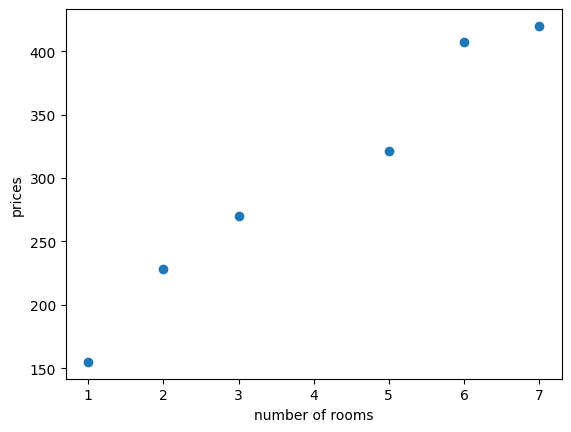

In [66]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 228, 270, 321, 407, 420])
utils.plot_points(features, labels)

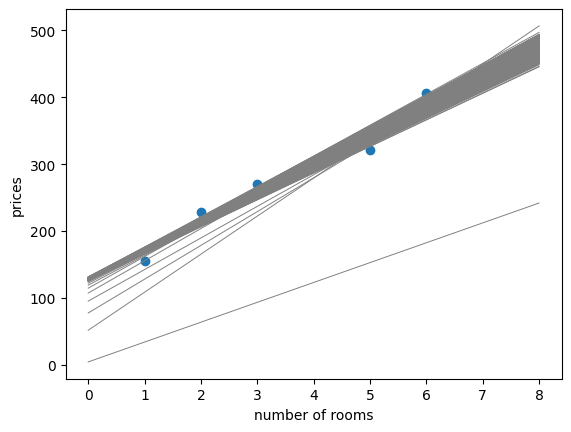

In [87]:
slope, intercept = linear_regression(features,
                                                               labels,
                                                               epochs=100_000,
                                                               visual=True,
                                                               period=200)

In [94]:
print(f'Price per room = {slope:.2f}$.')
print(f'Base house price = {intercept:.2f}$.')

Price per room = 42.12$.
Base house price = 129.19$.


In [93]:
r = 4
c = slope * r + intercept
print(f'Price of house with {r} rooms is {c:.2f}$.')

Price of house with 4 rooms is 297.67$.
